In [81]:
from utilities import *
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [33]:
def initialisation(X):
  ''' Initialise le vecteur colonne W et le scalaire b à des valeurs random. Ce sont les paramètres du modèle à ajuster plus tard'''
  W = np.random.randn(X.shape[1], 1) 
  # W est un vecteur colonne de dimension le nombre de variables (=nb de colonnes de X). En effet, chaque paramètre à un poids qu'il faut ajuster
  b = np.random.randn(1) # Scalaire
  return W, b

In [34]:
def model(X, W, b):
  '''Calcul du vecteur colonne A'''
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z)) # Vecteur colonne de dimension m contenant les probas pour chaque paramètre 
  return A

In [57]:
def log_loss(A, y):
  ''' Fonction coût, retourne un scalaire sur la véracité du modèle'''
  epsilon = 1e-15 # Pour ne jamais prendre log 0
  return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1-A + epsilon) )

In [36]:
def gradients(A, X, y):
  ''' Calcul des gradients '''
  dW = 1/ len(y) * np.dot(X.T, A-y) #Vecteur colonne de dimension m
  db = 1/ len(y) * np.sum(A - y) # Scalaire
  return dW, db

In [37]:
def update(dW, db, W, b, learning_rate):
  ''' Met à jour le modèle en ajustant les paramètres W et b'''
  W = W - learning_rate * dW 
# Si le gradient (dW) devient nul, W converge vers une valeur finale. Or ce gradient ne cv que si A-y --> 0, c'est à dire les probas mesurées --> 1 
  b = b - learning_rate * db
  return W, b

In [38]:
def predict(X, W, b, printProba = False):
  ''' Calcul le vecteur probas A pour un jeu de donnée X avec le modèle réglé aux paras W et b '''
  A = model(X, W, b)
  if printProba : print(A)
  return A >= 0.5 # Si la proba est >= 0.5, retourne True

In [1]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate=0.01, n_iter=1000):
  ''' Applique le procédé itératif : 
    -Calcul du vecteur colonne proba
    -Calcul l'erreur (le coût)
    -Calcul du vecteur colonne gradient W et du scalaire gradient b (càd l'évolution de l'erreur en fonction de W et b qui varient)
    -Mise à jour de W et b
  '''
  # Initialisation des para W et b
  W, b = initialisation(X_train)

  train_loss = []
  train_acc = []
  test_loss = []
  test_acc = []

  # Itération pour calculer W et b
  for i in tqdm(range(n_iter)):
    # Activation
    A = model(X_train, W, b)

    if i % 10 == 0: # Limitation du nb de données à afficher (rapidité calcul)
      # Coût
      train_loss.append(log_loss(A, y_train)) 

      # Train
      train_loss.append(log_loss(A, y_train))
      y_pred = predict(X_train, W, b) # Calcul du vecteur colonne des prédictions 
      train_acc.append(accuracy_score(y_train, y_pred))
    
      # Test
      A_test = model(X_test, W, b)
      test_loss.append(log_loss(A_test, y_test))
      y_pred = predict(X_test, W, b) # Calcul du vecteur colonne des prédictions 
      test_acc.append(accuracy_score(y_test, y_pred))
    

    # Gradients et mise à jour
    dW, db = gradients (A, X_train, y_train) 
    W, b = update(dW, db, W, b, learning_rate)
  
  plt.figure(figsize=(12, 4))
  
  plt.subplot(1, 2, 1)
  plt.plot(train_loss, label="Train loss")
  plt.plot(test_loss, label="Test loss")
  plt.legend()
  
  plt.subplot(1, 2, 2)
  plt.plot(train_acc, label="Train acc")
  plt.plot(test_acc, label="Test acc")
  plt.legend()

  plt.show()

  return W, b



PREPROCESSING DATASET

In [58]:
X_train, Y_train, X_test, Y_test = load_data()
print(f'Taille de X : {X_train.shape}') # Liste de 64 listes contenant 64 listes contenant une valeur (0 - 255) 
print(f'Taille de Y : {Y_train.shape}') # Vecteur colonne

Taille de X : (1000, 64, 64)
Taille de Y : (1000, 1)


Reshape

In [59]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) # Passage en deux dimensions (matrice 1000x4096)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1) # Passage en deux dimensions (matrice 200x4096)

print(X_train_reshaped.shape, X_test_reshaped.shape)

(1000, 4096) (200, 4096)


Normalisation 

On normalise pour que chaque paramètre ait la même influence sur la fonction coût de manière à ce que la fonction coût puisse converger vers 0

In [60]:
X_train_reshaped = X_train_reshaped / X_train_reshaped.max()
X_test_reshaped = X_test_reshaped / X_test_reshaped.max()

100%|██████████| 1000/1000 [00:08<00:00, 114.76it/s]


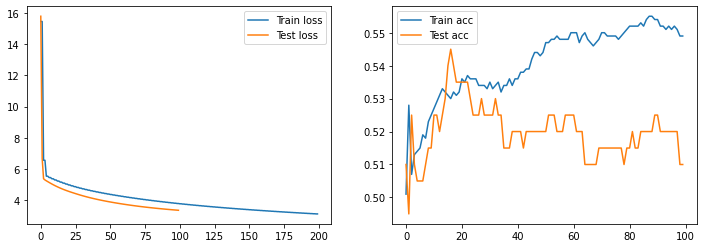

(array([[-1.72441153],
       [-1.39148431],
       [-0.07066565],
       ...,
       [-1.23657462],
       [ 0.927975  ],
       [ 1.20929168]]), array([-1.33065213]))


In [91]:
print(artificial_neuron(X_train_reshaped, Y_train, X_test_reshaped, Y_test))